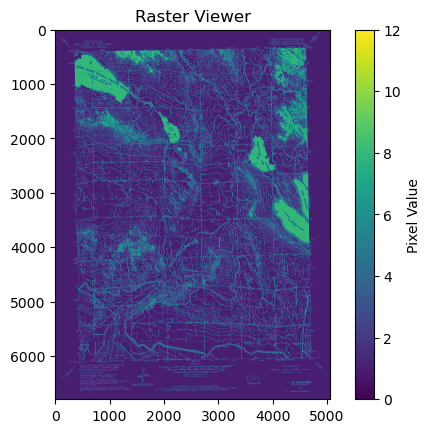

The raster has only 1 band. Reading band 1.


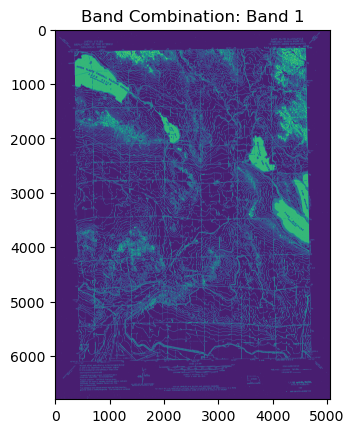

Column 'attribute_column' not found in the shapefile.


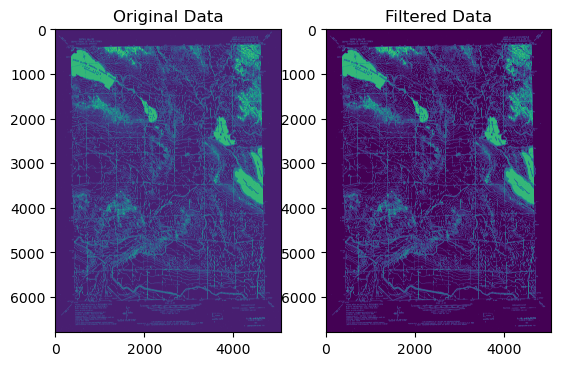

In [51]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

# Function to load and display raster data
def display_raster(raster_path):
    raster = rasterio.open(raster_path)
    raster_data = raster.read()
    plt.imshow(raster_data[0], cmap='viridis')
    plt.title('Raster Viewer')
    plt.colorbar(label='Pixel Value')
    plt.show()

#Function to change band combination dynamically    
def change_band_combination(raster_path, bands):
    try:
        with rasterio.open(raster_path) as raster:
            num_bands = raster.count

            if num_bands == 1:
                print(f"The raster has only 1 band. Reading band 1.")
                raster_data = raster.read(1)
            else:
                print(f"Invalid band indices. The raster has {num_bands} band(s). Reading the first band.")
                raster_data = raster.read(1)

            plt.imshow(raster_data, cmap='viridis')
            plt.title(f'Band Combination: Band 1')
            plt.show()

    except Exception as e:
        print(f"Error reading raster: {e}")
        
        
# Function to load and process shapefile data
def plot_shapefile_attribute_data(shapefile_path, column_name='attribute_column'):
    try:
        gdf = gpd.read_file(shapefile_path)
        if column_name not in gdf.columns:
            print(f"Column '{column_name}' not found in the shapefile.")
            return

        fig, ax = plt.subplots()
        gdf.plot(column=column_name, ax=ax, legend=True)
        plt.title('Shapefile Attribute Data')
        plt.show()

    except Exception as e:
        print(f"Error reading shapefile: {e}")

# Function to perform array manipulation using NumPy
def numpy_operations(raster_path):
    raster = rasterio.open(raster_path)
    raster_data = raster.read()
    
    # Example NumPy operations (you can perform various array manipulations)
    mean_value = np.mean(raster_data)
    filtered_data = np.where(raster_data < mean_value, 0, raster_data)

    # Display the original and filtered data
    plt.subplot(1, 2, 1)
    plt.imshow(raster_data[0], cmap='viridis')
    plt.title('Original Data')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_data[0], cmap='viridis')
    plt.title('Filtered Data')

    plt.show()

# Example usage
raster_path = 'C:\\Users\\HP\\Downloads\\Basic Raster Viewer-20240128T064425Z-001\\Basic Raster Viewer\\raster-viewer-shapefile-analyzer\\raster-viewer\\LAKE_ALICE.tif'
shapefile_path = 'C:\\Users\\HP\Downloads\\Basic Raster Viewer-20240128T064425Z-001\\Basic Raster Viewer\\raster-viewer-shapefile-analyzer\\raster-viewer\\\cb_2018_us_aiannh_500k.shp'

# Display the raster
display_raster(raster_path)

# Change band combination
change_band_combination(raster_path, bands=(1,2,3))

# Plot shapefile attribute data
#plot_shapefile_attribute_data(shapefile_path)
plot_shapefile_attribute_data(shapefile_path, column_name='attribute_column')

# NumPy array manipulation
numpy_operations(raster_path)
